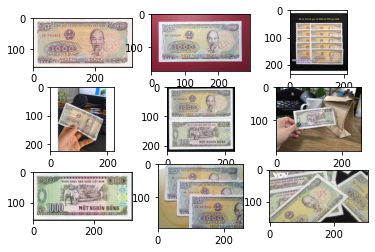

In [10]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Tien-CNN/Tien/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'1k'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [12]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/Tien-CNN/Tien/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('1k'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('2k'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('5k'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('10k'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('20k'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('50k'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('100k'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('11TienGiay_photos.npy', photos)
save('11TienGiay_labels.npy', labels)

(69, 200, 200, 3) (69,)


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(11, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(photos, labels, epochs=20, verbose=1)

Epoch 1/20
3/3 [==============================] - 5s 984ms/step - loss: 1922.3594 - accuracy: 0.0435
Epoch 2/20
3/3 [==============================] - 4s 962ms/step - loss: 986.0842 - accuracy: 0.1594
Epoch 3/20
3/3 [==============================] - 4s 964ms/step - loss: 440.9714 - accuracy: 0.1594
Epoch 4/20
3/3 [==============================] - 4s 942ms/step - loss: 113.6954 - accuracy: 0.2464
Epoch 5/20
3/3 [==============================] - 3s 947ms/step - loss: 26.7928 - accuracy: 0.3333
Epoch 6/20
3/3 [==============================] - 3s 952ms/step - loss: 2.9267 - accuracy: 0.6667
Epoch 7/20
3/3 [==============================] - 4s 962ms/step - loss: 0.7859 - accuracy: 0.7681
Epoch 8/20
3/3 [==============================] - 4s 947ms/step - loss: 0.3576 - accuracy: 0.9275
Epoch 9/20
3/3 [==============================] - 3s 947ms/step - loss: 0.3485 - accuracy: 0.9420
Epoch 10/20
3/3 [==============================] - 4s 951ms/step - loss: 0.0737 - accuracy: 0.9855
Epoch 11/

In [14]:
model.evaluate(photos,labels)

3/3 [==============================] - 1s 247ms/step - loss: 0.0012 - accuracy: 1.0000


[0.0012273991014808416, 1.0]

In [15]:
model.save('11TienGiay_Final.h5')

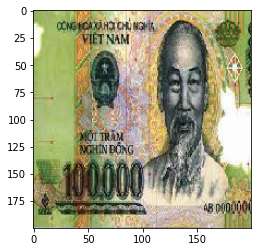

In [17]:
from keras.models import load_model
models=load_model('11TienGiay_Final.h5')

classes = ["1k","2k","5k","10k","20k","50k"]

import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('/content/drive/MyDrive/Tien-CNN/Tien/100k1.jpg', target_size=(200,200))
plt.imshow(img)